In [ ]:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import shutil

# Specify the source folder path from the dataset
src_folder = '/kaggle/input/remote/Custom'

# Specify the destination folder path in your working directory
dst_folder = "/kaggle/working/Data"

# Copy the folder and its contents to the working directory
shutil.copytree(src_folder, dst_folder)

'/kaggle/working/Data'

In [ ]:
pip install pydot graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


BASE_DIR = "/kaggle/input/flickr8k"

WORKING_DIR = "/kaggle/working/"

WORKING_DIR

'/kaggle/working/'

In [3]:
import os

print("Working Directory:", WORKING_DIR)
print("Base Directory:", BASE_DIR)

Working Directory: /kaggle/working/
Base Directory: /kaggle/input/flickr8k


In [ ]:
pip install tensorflow==1.14

In [ ]:


tf.executing_eagerly()


True

In [4]:
import pickle
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Embedding, LSTM, Dropout, Flatten, Input, add, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical, plot_model

2024-04-14 16:06:12.989511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 16:06:12.989642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 16:06:13.123269: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import pandas as pd

captions_df = pd.read_csv(os.path.join(BASE_DIR, 'captions.txt'))

captions_df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [ ]:
import re
for i in captions_df["image"]:
    x = re.search("([^\s]+(\.(?i)(jpg|png|gif|bmp))$)", i)
    if (x):
        pass
    else:
        print(f"YES! We have a match!: {i}")

<ipython-input-59-0cd2a93d9329>:3: DeprecationWarning: Flags not at the start of the expression '([^\\s]+(\\.(?i)(jpg|p' (truncated) but at position 10

  x = re.search("([^\s]+(\.(?i)(jpg|png|gif|bmp))$)", i)


In [6]:
captions_df.caption.values

array(['A child in a pink dress is climbing up a set of stairs in an entry way .',
       'A girl going into a wooden building .',
       'A little girl climbing into a wooden playhouse .', ...,
       'A person in a red shirt climbing up a rock face covered in assist handles .',
       'A rock climber in a red shirt .',
       'A rock climber practices on a rock climbing wall .'], dtype=object)

In [6]:
#import tensorflow as tf
#from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D

model = Sequential([
    Conv2D(64, (3, 3), strides=(1, 1), padding='same',activation = 'relu', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    Conv2D(64, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    Conv2D(64, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    MaxPooling2D((3, 3), strides=(2, 2), padding='same'),

    Conv2D(128, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    Conv2D(128, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=(2, 2), padding='same'),

    Conv2D(256, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    Conv2D(128, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=(2, 2), padding='same'),

    Conv2D(512, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    Conv2D(512, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
    
    Conv2D(512, (3, 3), strides=(1, 1),activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=(2, 2), padding='same') 
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,239,296 (23.80 MB)

 Trainable params: 6,236,736 (23.79 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [ ]:
import shutil

# Specify the source folder path from the dataset
src_folder = '/kaggle/input/flickr8k'

# Specify the destination folder path in your working directory
dst_folder = WORKING_DIR + "/flickr8k"

# Copy the folder and its contents to the working directory
shutil.copytree(src_folder, dst_folder)

In [6]:
dir = BASE_DIR + '/Images'

img_paths = []

for img_name in os.listdir(dir):
    img_path = dir + '/' + img_name
    img_paths.append(img_path)

print(len(img_paths))
print(img_paths[0])

8091
/kaggle/input/flickr8k/Images/3226254560_2f8ac147ea.jpg


In [7]:
def preprocess_input(image):
  img_array = image / 255.0

  return img_array


In [8]:
def load_image(image_path):
    image_path_str = tf.strings.as_string(image_path)  # Convert tensor to string tensor
    image_name = tf.strings.split(tf.strings.split(image_path_str, '/')[-1], '.')[0]  # Extract image name
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = preprocess_input(img)
    return img, image_name

img = load_image(BASE_DIR + '/Images/3582465732_78f77f34ae.jpg')[0]
print(img.shape)

(224, 224, 3)


In [12]:
image_dataset = tf.data.Dataset.from_tensor_slices(img_paths)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

print(f"Let's check the BatchDataset shapes--> {image_dataset}")


Let's check the BatchDataset shapes--> <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [13]:
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
# %%time
# for img, path in tqdm(image_dataset):
#   batch_features = image_features_extract_model(img)
#   batch_features = tf.reshape(batch_features,
#                               (batch_features.shape[0], -1, batch_features.shape[3]))

#   for bf, p in zip(batch_features, path):
#     path_of_feature = p.numpy().decode("utf-8")
#     np.save(path_of_feature, bf.numpy())

In [ ]:
import shutil

save_dir = 'kaggle/working/Features'

#shutil.rmtree('/kaggle/working/flickr8k')

In [16]:
os.chdir(WORKING_DIR)
os.makedirs('Custom_Features', exist_ok = True)

In [ ]:
os.remove('/kaggle/working/Features/Tensor("args_0:0", shape=(), dtype=string).pkl')

In [ ]:
import shutil

shutil.rmtree('/content/drive/MyDrive/Project/Image Captioning/checkpoint_final')

In [ ]:
# for item in image_dataset.take(1):
#     print(item)

In [17]:
import pickle

save_dir = tf.constant(WORKING_DIR + '/Custom_Features')
save_dir = save_dir.numpy().decode('utf-8')

for img, name in tqdm(image_dataset):
  batch_features = model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, image_name in zip(batch_features, name):
    image_feature_name = image_name.numpy().decode('utf-8')
    #image_feature_name = p.numpy().decode('utf-8')
    #full_path = os.path.join(save_dir, image_feature_name)
    #print(save_dir)
    #print(image_feature_name)

    with open(os.path.join(save_dir, image_feature_name + '.pkl'),'wb') as f:
        pickle.dump(bf,f)


  0%|          | 0/127 [00:00<?, ?it/s]

In [10]:
count = 0

save_dir = WORKING_DIR + '/Custom_Features'

for i in os.listdir(save_dir):
    count += 1

print(count)


8091


In [ ]:
tf.data.Dataset.from_tensor_slices?

In [19]:
bf.numpy().shape

(49, 512)

In [20]:
batch_features.numpy().shape

(27, 49, 512)

In [21]:
len(captions_df.caption)

40455

In [22]:
len(set(captions_df.image))

8091

In [10]:
def get_name(path):
    name = os.path.basename(path)
    name = name.split('.')[0]
    return name

name = get_name(BASE_DIR + '/Images/2567035103_3511020c8f.jpg')
print(name)

2567035103_3511020c8f


In [11]:
all_captions = []

for caption in captions_df['caption']:
    caption = "<sos> " + caption + " <eos>"
    all_captions.append(caption)

all_captions[:10]

['<sos> A child in a pink dress is climbing up a set of stairs in an entry way . <eos>',
 '<sos> A girl going into a wooden building . <eos>',
 '<sos> A little girl climbing into a wooden playhouse . <eos>',
 '<sos> A little girl climbing the stairs to her playhouse . <eos>',
 '<sos> A little girl in a pink dress going into a wooden cabin . <eos>',
 '<sos> A black dog and a spotted dog are fighting <eos>',
 '<sos> A black dog and a tri-colored dog playing with each other on the road . <eos>',
 '<sos> A black dog and a white dog with brown spots are staring at each other in the street . <eos>',
 '<sos> Two dogs of different breeds looking at each other on the road . <eos>',
 '<sos> Two dogs on pavement moving toward each other . <eos>']

In [12]:
image_names = []

for name in captions_df['image']:
    image_name = get_name(name)
    image_names.append(image_name)

image_names[:10]

['1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1001773457_577c3a7d70',
 '1001773457_577c3a7d70',
 '1001773457_577c3a7d70',
 '1001773457_577c3a7d70']

In [13]:
from sklearn.utils import shuffle

shuffled_captions, shuffled_image_names = shuffle(all_captions,
                                                  image_names,
                                                  random_state=1)

In [ ]:
#len(shuffled_captions)


In [ ]:
# len(shuffled_image_names)
# shuffled_image_names[:10]

In [14]:
#function for getting maxlen of the caption

def get_maxlen(captions):
    len_caption = []
    for caption in captions_df['caption']:
        len_caption.append(len(caption.split()))

    return max(len_caption)

In [15]:
# utilizing the tokenizer

top_k = 5000
tokenizer = Tokenizer(num_words = top_k, oov_token = '<unk>', filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

tokenizer.fit_on_texts(shuffled_captions)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(shuffled_captions)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)


8498


In [ ]:
tokenizer.word_index['<pad>']

8497

In [29]:
tokenizer.index_word[0]

'<pad>'

In [ ]:
#tokenizer.word_index

In [16]:
max_length = get_maxlen(train_seqs)
print(max_length)

38


In [17]:
caption_vector = pad_sequences(train_seqs, maxlen = max_length, padding = 'post')
print(caption_vector.shape)

(40455, 38)


In [18]:
# train test split

from sklearn.model_selection import train_test_split

train_image, test_image, train_caption, test_caption = train_test_split(shuffled_image_names,
                                                                        caption_vector,
                                                                       test_size = 0.2,
                                                                       random_state = 0)

In [33]:
len(train_image), len(test_image), len(train_caption), len(test_caption)

(32364, 8091, 32364, 8091)

In [36]:
train_image[0]

'386655611_1329495f97'

In [35]:
train_caption[0]

array([  3,   6,  28,   9,  15,  10, 354,   2, 297,  56, 128, 125,   6,
        43,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [19]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
num_steps = len(train_image) // BATCH_SIZE
features_shape = 512
attention_features_shape = 49

In [37]:

save_dir = tf.constant(WORKING_DIR + '/Custom_Features')
save_dir = save_dir.numpy().decode('utf-8')

def map_func(image_name, caption):
    name = tf.constant(image_name)
    image_name_str = name.numpy().decode('utf-8')
    with open(os.path.join(str(save_dir), image_name_str + ".pkl"),'rb') as f:
        img_tensor = pickle.load(f)
    return img_tensor, caption

tensor, cap = map_func(train_image[0], train_caption[0])
print(tensor)
print(cap)


tf.Tensor(
[[5.6969468e-03 8.5808890e-04 6.9101481e-03 ... 8.3948771e-04
  0.0000000e+00 2.6391570e-03]
 [6.2151914e-03 1.0766821e-04 2.4336139e-03 ... 4.5552521e-04
  0.0000000e+00 7.6999504e-04]
 [6.5719765e-03 2.9444334e-04 2.8733083e-03 ... 4.5552521e-04
  0.0000000e+00 5.7720026e-04]
 ...
 [1.4963779e-03 0.0000000e+00 1.1382512e-03 ... 2.0187506e-03
  0.0000000e+00 0.0000000e+00]
 [1.6956849e-03 0.0000000e+00 2.8363517e-03 ... 2.8533968e-03
  0.0000000e+00 0.0000000e+00]
 [1.3383204e-03 0.0000000e+00 2.8363517e-03 ... 6.6219067e-04
  2.5964633e-05 0.0000000e+00]], shape=(49, 512), dtype=float32)
[  3   6  28   9  15  10 354   2 297  56 128 125   6  43   4   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [ ]:
# for i in os.listdir(features_dir):
#     name = i.split('.')[0]
#     if name == train_image[0]:
#         print("found")
#         break
#     else:
#         continue



In [38]:

dataset = tf.data.Dataset.from_tensor_slices((train_image, train_caption))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
for item in dataset.take(1):
    print(item)

KeyboardInterrupt: 

In [37]:
len(dataset)

506

In [ ]:
tf.data.experimental.enable_debug_mode()

# Model


In [20]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (batch_size, 64, hidden_size)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
    attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.lstm = tf.keras.layers.LSTM(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state, c_state = self.lstm(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [21]:
# BATCH_SIZE = 64
# BUFFER_SIZE = 1000
# embedding_dim = 256
# units = 512
# num_steps = len(train_image) // BATCH_SIZE
# features_shape = 512
# attention_features_shape = 49

encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [ ]:
encoder.summary()

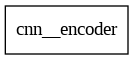

In [ ]:
import tensorflow as tf

# Plot the CNN Encoder model
tf.keras.utils.plot_model(encoder, to_file='encoder_model.png', show_shapes=True)


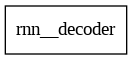

In [ ]:
# Plot the RNN Decoder model

tf.keras.utils.plot_model(decoder, to_file='decoder_model.png', show_shapes=True)


In [ ]:
decoder.summary()

In [22]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [42]:
# saving checkpoint

checkpoint_path_ckpt = WORKING_DIR + "/checkpoint_final/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [43]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

# Training

In [ ]:
# Function to save the entire model
def save_model(encoder, decoder):
    tf.saved_model.save(encoder, ckpt_manager.save_checkpoint_path)
    tf.saved_model.save(encoder, ckpt_manager.save_checkpoint_path)


In [44]:
import time

loss_plot = []

@tf.function
def train_step(img_tensor, target):
    loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<sos>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

        total_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables

        gradients = tape.gradient(loss, trainable_variables)

        optimizer.apply_gradients(zip(gradients, trainable_variables))

        return loss, total_loss


EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
        ckpt_manager.save()


    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))


Epoch 1 Batch 0 Loss 2.8385
Epoch 1 Batch 100 Loss 1.4755
Epoch 1 Batch 200 Loss 1.2481
Epoch 1 Batch 300 Loss 1.4643
Epoch 1 Batch 400 Loss 1.2989
Epoch 1 Batch 500 Loss 1.2751
Epoch 1 Loss 1.423008
Time taken for 1 epoch 127.6018316745758 sec

Epoch 2 Batch 0 Loss 1.2996
Epoch 2 Batch 100 Loss 1.2636
Epoch 2 Batch 200 Loss 1.2040
Epoch 2 Batch 300 Loss 1.2670
Epoch 2 Batch 400 Loss 1.1328
Epoch 2 Batch 500 Loss 1.1191
Epoch 2 Loss 1.216122
Time taken for 1 epoch 84.59896206855774 sec

Epoch 3 Batch 0 Loss 1.1089
Epoch 3 Batch 100 Loss 1.0755
Epoch 3 Batch 200 Loss 1.1535
Epoch 3 Batch 300 Loss 1.1944
Epoch 3 Batch 400 Loss 1.1061
Epoch 3 Batch 500 Loss 1.0612
Epoch 3 Loss 1.146781
Time taken for 1 epoch 84.53280544281006 sec

Epoch 4 Batch 0 Loss 1.1212
Epoch 4 Batch 100 Loss 1.2028
Epoch 4 Batch 200 Loss 1.1273
Epoch 4 Batch 300 Loss 1.0827
Epoch 4 Batch 400 Loss 1.1402
Epoch 4 Batch 500 Loss 1.0446
Epoch 4 Loss 1.103500
Time taken for 1 epoch 84.64354133605957 sec

Epoch 5 Batch 0 

In [45]:
ckpt_manager.save()

'/kaggle/working//checkpoint_final/train/ckpt-5'

In [35]:
checkpoint_path_ckpt = WORKING_DIR + "/checkpoint_final/train"

checkpoint_path = checkpoint_path_ckpt
#tf.compat.v2.keras.callbacks.ModelCheckpoint
ckpt = tf.train.Checkpoint(encoder=encoder,
                               decoder=decoder,
                               optimizer = optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    # Restore the latest checkpoint
    ckpt.restore(ckpt_manager.latest_checkpoint)


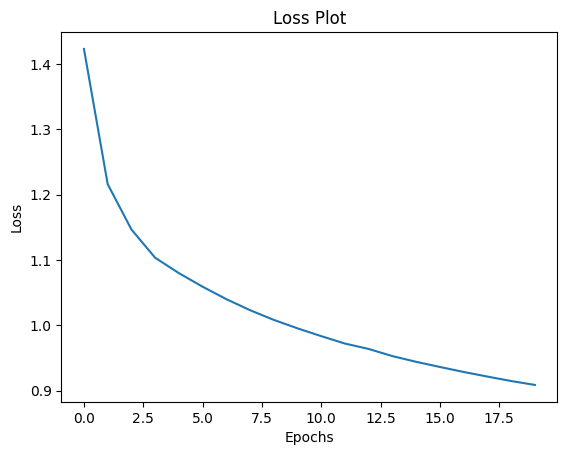

In [46]:
import matplotlib.pyplot as plt

plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [71]:
with open(WORKING_DIR + '/loss_plot.pkl','wb') as f:
    pickle.dump(loss_plot, f)

In [ ]:
import pickle

with open(WORKING_DIR + '/loss_plot.pkl','rb') as r:
    pickle.load(r)

In [23]:
import json
from glob import glob
from PIL import Image

def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

#     img_path = tf.constant(BASE_DIR + '/Images/' + image)
#     print(img_path)
#     img = load_image(img_path)[0]

#     temp_input = tf.expand_dims(img, 0)
#     img_tensor_val = image_features_extract_model(temp_input)

    name = image.split('.')[0]

    with open(WORKING_DIR + '/Custom_Features/' + name + ".pkl","rb") as t:
        img_tensor_val = pickle.load(t)
        
    #img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<sos>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<eos>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [48]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(os.path.join(BASE_DIR, 'Images',image)))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    #plt.tight_layout()
    plt.show()

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_caption(image):
  real_caption = ' '.join([tokenizer.index_word[i] for i in test_caption[rid] if i not in [0]])
  result, attention_plot = evaluate(image)

  for i in result:
      if i=="<unk>":
          result.remove(i)

  print ('Real Caption:', real_caption)
  print ('Prediction Caption:', ' '.join(result))
  plot_attention(image, result, attention_plot)
  # opening the image
  #Image.open(os.path.join(WORKING_DIR, 'Images', image + ".jpg"))
  path = os.path.join(BASE_DIR, 'Images', image)
  img = mpimg.imread(path)
  plt.imshow(img)


tf.Tensor(b'/kaggle/input/flickr8k/Images/2661489896_cc3425777e.jpg', shape=(), dtype=string)
Real Caption: <sos> small boy is eating a lollipop and dancing in the street <eos>
Prediction Caption: a man in a red jacket is jumping in the snow <eos>


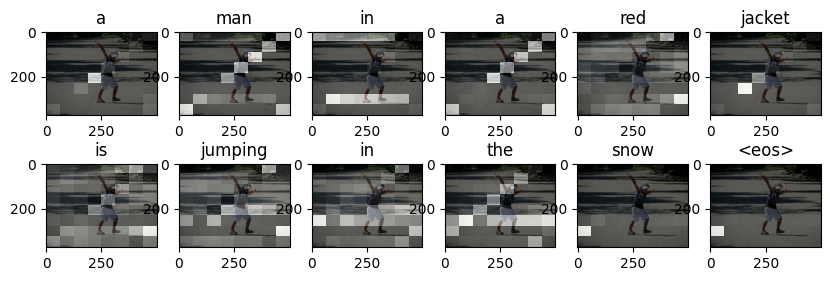

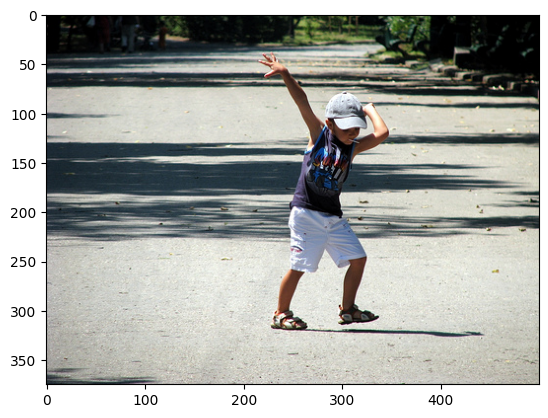

In [52]:
rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

predict_caption(image)

tf.Tensor(b'/kaggle/input/flickr8k/Images/3661239105_973f8216c4.jpg', shape=(), dtype=string)
Real Caption: <sos> a boy hanging from a jungle gym <eos>
Prediction Caption: a man in a red shirt is sitting on a dirt path <eos>


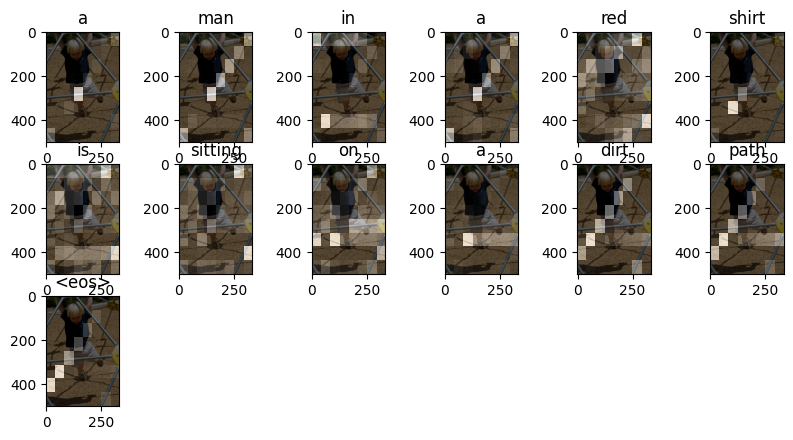

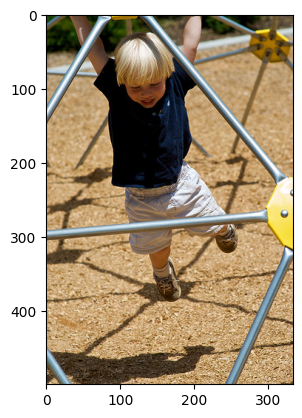

In [53]:
rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

predict_caption(image)

tf.Tensor(b'/kaggle/input/flickr8k/Images/3507076266_8b17993fbb.jpg', shape=(), dtype=string)
Real Caption: <sos> a man in a brown jacket is leading a black <unk> horse <eos>
Prediction Caption: a man in a red shirt is sitting on a rock wall <eos>


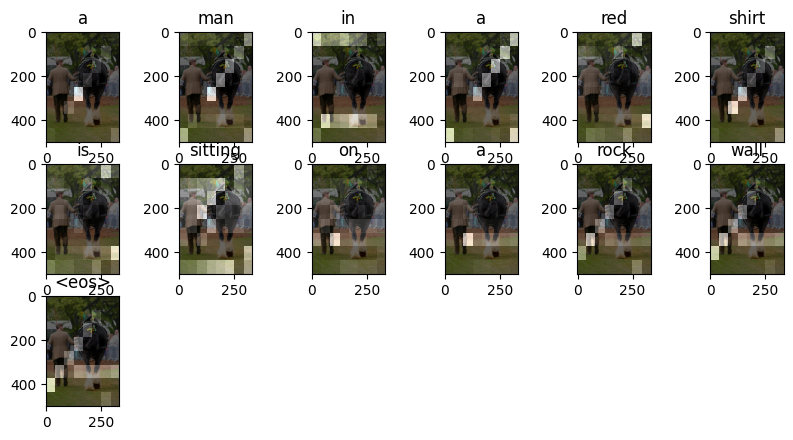

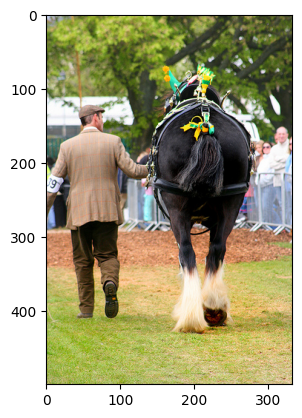

In [55]:
rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

predict_caption(image)

tf.Tensor(b'/kaggle/input/flickr8k/Images/3680031186_c3c6698f9d.jpg', shape=(), dtype=string)
Real Caption: <sos> a man is playing baseball <eos>
Prediction Caption: a man in a red jacket is jumping in the air <eos>


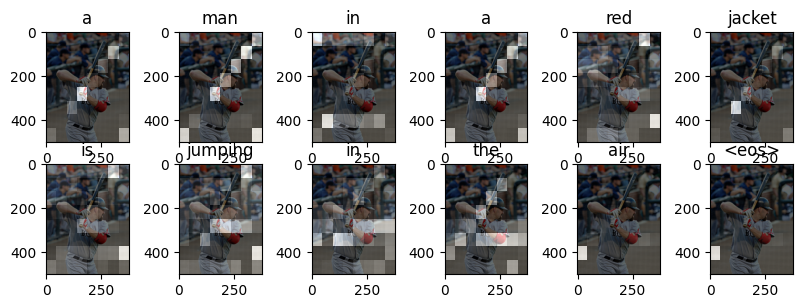

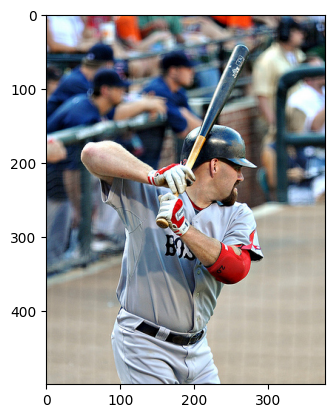

In [56]:
rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

predict_caption(image)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'a', 'test','of', 'cricket', 'match']]
candidate = ['this', 'is', 'a', 'test','of', 'cricket', 'match']
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

Individual 1-gram: 0.857143

Individual 2-gram: 0.666667

Individual 3-gram: 0.600000

Individual 4-gram: 0.500000


tf.Tensor(b'/kaggle/input/flickr8k/Images/2833560457_24aedf3bef.jpg', shape=(), dtype=string)
BLEU score: 17.14985851425088
Real Caption: a light colored dog runs through the grass
Prediction Caption: a dog is running through the grass


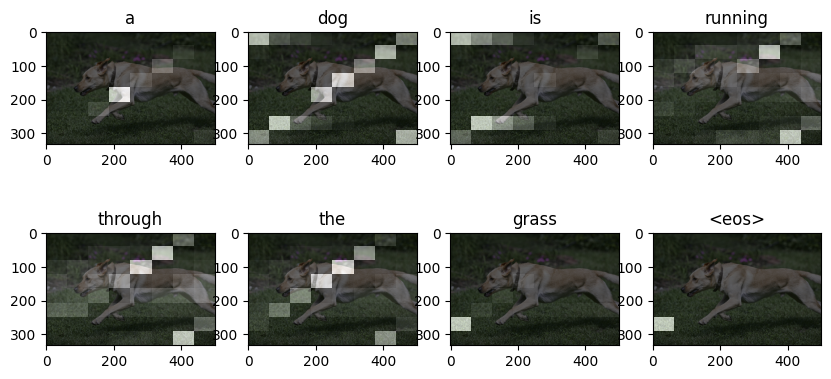

time took to Predict: 1 sec


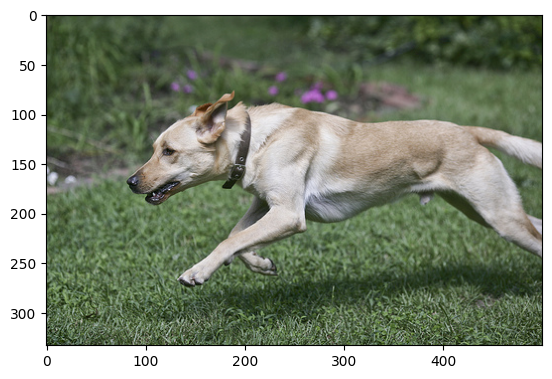

In [58]:
from nltk.translate.bleu_score import sentence_bleu
import time

rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in test_caption[rid] if i not in [0]])
result, attention_plot = evaluate(image)


first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final
score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)
plot_attention(image, result, attention_plot)

print(f"time took to Predict: {round(time.time()-start)} sec")
# opening the image
path = os.path.join(BASE_DIR, 'Images', image)
img = mpimg.imread(path)
plt.imshow(img)

tf.Tensor(b'/kaggle/input/flickr8k/Images/2751567262_e089b33ed9.jpg', shape=(), dtype=string)
BLEU score: 26.111648393354674
Real Caption: a man in a blue shirt standing in front of a building
Prediction Caption: a man in a red shirt is jumping in the grass


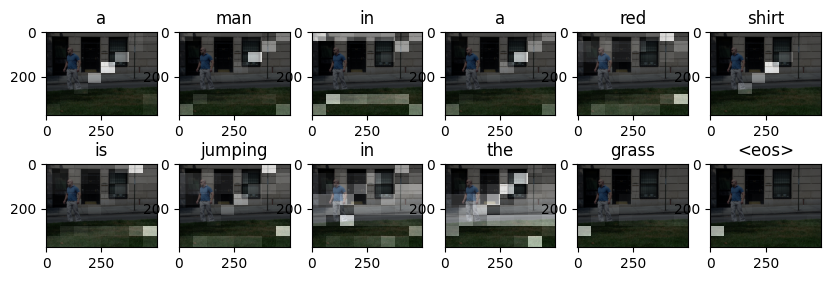

time took to Predict: 2 sec


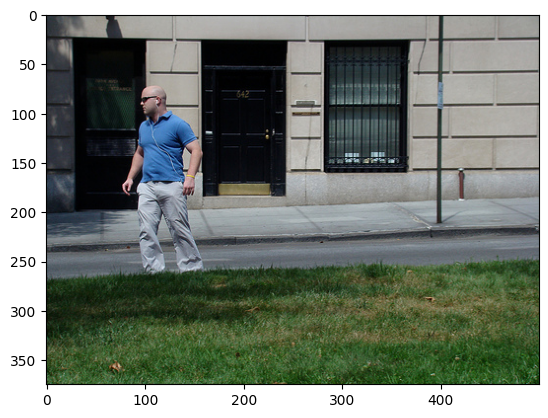

In [59]:
from nltk.translate.bleu_score import sentence_bleu
import time

rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in test_caption[rid] if i not in [0]])
result, attention_plot = evaluate(image)


first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final
score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)
plot_attention(image, result, attention_plot)

print(f"time took to Predict: {round(time.time()-start)} sec")
# opening the image
path = os.path.join(BASE_DIR, 'Images', image)
img = mpimg.imread(path)
plt.imshow(img)

tf.Tensor(b'/kaggle/input/flickr8k/Images/3446347599_0ecc49a9d5.jpg', shape=(), dtype=string)
BLEU score: 0
Real Caption: two men look over cliff near the beach
Prediction Caption: a man in a blue shirt is jumping into the air


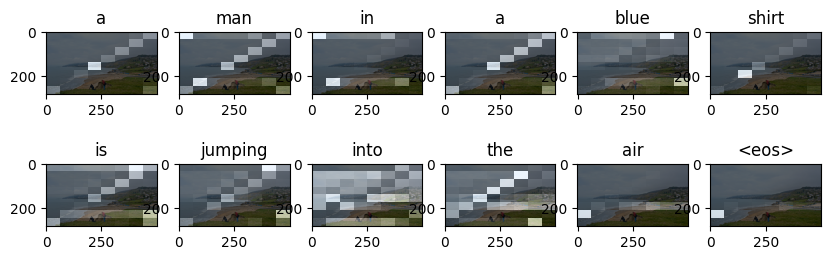

time took to Predict: 2 sec


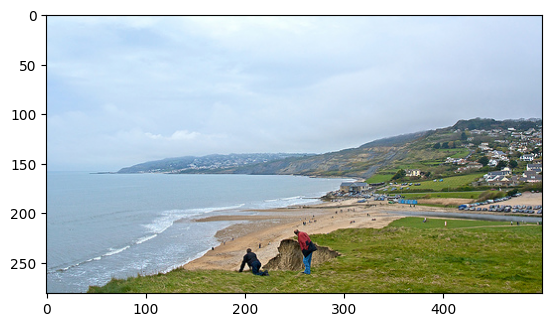

In [60]:
from nltk.translate.bleu_score import sentence_bleu
import time

rid = np.random.randint(0, len(test_image))
image = test_image[rid] + '.jpg'

start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in test_caption[rid] if i not in [0]])
result, attention_plot = evaluate(image)


first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final
score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)
plot_attention(image, result, attention_plot)

print(f"time took to Predict: {round(time.time()-start)} sec")
# opening the image
path = os.path.join(BASE_DIR, 'Images', image)
img = mpimg.imread(path)
plt.imshow(img)

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [ ]:
# import zipfile
# import os
# from IPython.display import FileLink

# def zip_dir(directory = os.path.join(WORKING_DIR), file_name = 'Features.zip'):
#     """
#     zip all the files in a directory

#     Parameters
#     _____
#     directory: str
#         directory needs to be zipped, defualt is current working directory

#     file_name: str
#         the name of the zipped file (including .zip), default is 'directory.zip'

#     Returns
#     _____
#     Creates a hyperlink, which can be used to download the zip file)
#     """
#     os.chdir(directory)
#     zip_ref = zipfile.ZipFile(file_name, mode='w')
#     for folder, _, files in os.walk(directory):
#         for file in files:
#             if file_name in file:
#                 pass
#             else:
#                 zip_ref.write(os.path.join(folder, file))

#     return FileLink(file_name)


In [ ]:
#!zip -r file.zip /kaggle/working/Features

In [24]:
# reading captions
import os 

with open(os.path.join(BASE_DIR,"captions.txt"),"r") as c:
  next(c)
  read_captions = c.read() # reading the file 'captions.txt' into read_captions

In [28]:
# creating mapping of image to their captions

from tqdm.notebook import tqdm

def create_mapping(doc):
  mapping = {}

  for line in tqdm(doc.split("\n")):
    if len(line) < 2:
      continue
    words = line.split(",")
    img_name = words[0]
    image_id = img_name.split(".")[0]

    caption = words[1:]
    caption = " ".join(caption)

    if image_id not in mapping:
      mapping[image_id] = []

    mapping[image_id].append(caption)

  return mapping

mapping = create_mapping(read_captions)


  0%|          | 0/40456 [00:00<?, ?it/s]

In [29]:
import pickle

with open(os.path.join(WORKING_DIR,'mapping.pkl'),'wb') as f:
    pickle.dump(mapping, f)

In [25]:
import pickle

with open(os.path.join(WORKING_DIR,'mapping.pkl'),'rb') as r:
    mapping = pickle.load(r)

In [26]:
mapping['3329793486_afc16663cc']

['A man on a snowboard is grinding a ramp .',
 'a skier on a snowy ski jump',
 'A snowboarder is riding down a ramp amidst snow .',
 'A snowboarder prepares to go over a ramp .',
 'Snowboarding practice on a snowy hillside']

In [27]:
def preprocess(mapping):
  for id,captions in mapping.items():
    for i in range(len(captions)):
      caption = captions[i]
      
      temp = []
      for word in caption.split():
        if len(word) > 1:
          temp.append(word)
      caption = "<SOS> " + ' '.join(temp) + " <EOS>"
      captions[i] = caption

preprocess(mapping)


In [28]:
mapping['3329793486_afc16663cc']

['<SOS> man on snowboard is grinding ramp <EOS>',
 '<SOS> skier on snowy ski jump <EOS>',
 '<SOS> snowboarder is riding down ramp amidst snow <EOS>',
 '<SOS> snowboarder prepares to go over ramp <EOS>',
 '<SOS> Snowboarding practice on snowy hillside <EOS>']

In [34]:
from sklearn.model_selection import train_test_split

image_ids = list(mapping.keys())

train, test = train_test_split(image_ids, test_size = 0.2, random_state = 42)

In [36]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction


actual, predicted = list(), list()

for key in tqdm(test):
    captions = mapping[key]
    #print(captions)
    
    key = key + ".jpg"
    result, _ = evaluate(key)
    
    for i in result:
      if i=="<unk>":
          result.remove(i)
    
    actual_captions = []
    
        
    for caption in captions:
        cap = list()
        words = caption.split()
        
        for word in words:
            if word in ['<SOS>','<EOS>']:
                continue
            cap.append(word)
        actual_captions.append(cap)
    
    actual.append(actual_captions)
    predicted.append(result)
    
#     print(actual)
#     print(predicted)
   

print("Bleu Score for Image Captioning(Inceptionv3)")

smoothing_function = SmoothingFunction()

print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function = smoothing_function.method1))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function = smoothing_function.method1))
    
    

  0%|          | 0/1619 [00:00<?, ?it/s]

Bleu Score for Image Captioning(Inceptionv3)
BLEU-1: 0.224919
BLEU-2: 0.099257


In [37]:
with open(WORKING_DIR + '/actual.pkl','wb') as a:
    pickle.dump(actual, a)
    
with open(WORKING_DIR + '/predicted.pkl','wb') as p:
    pickle.dump(predicted, p)

In [47]:
print("Bleu Score for Image Captioning(Custom)")

from nltk.translate.bleu_score import SmoothingFunction

smoothing_function = SmoothingFunction()

print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function = smoothing_function.method1))

Bleu Score for Image Captioning(Custom)
BLEU-1: 0.042090
BLEU-2: 0.011291
